# 딥러닝 라이브러리 2가지
## 텐서플로우(google) - 산업용
* 이미지 관련 라이브러리
* keras를 이용해 코딩이 쉬움
* 순차적, 함수적, 클래스

## 파이토치 (meta) - 연구용
* 자연어관련 라이브러리
* 허깅페이스, 랭체인
* 클래스 - 무조건 상속받아서 구현

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [67]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [68]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [69]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
data = data[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch','Embarked' ]]

In [71]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [72]:
data['family'] = data['Parch']+ data['SibSp']
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0
887,1,1,female,19.0,0,0,S,0
888,0,3,female,NaN,1,2,S,3
889,1,1,male,26.0,0,0,C,0


In [73]:
data['Age']= data['Age'].fillna(data['Age'].mean())

In [74]:
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
 7   family    891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [76]:
data = data.drop(['Parch','SibSp'], axis=1)

In [77]:
data = pd.get_dummies(data, drop_first=True)

In [78]:
data

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,True,False,True
1,1,1,38.000000,1,False,False,False
2,1,3,26.000000,0,False,False,True
3,1,1,35.000000,1,False,False,True
4,0,3,35.000000,0,True,False,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,True,False,True
887,1,1,19.000000,0,False,False,True
888,0,3,29.699118,3,False,False,True
889,1,1,26.000000,0,True,False,False


In [79]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=42)

# 딥러닝시에도 데이터릐 스케일을 맞춰 주는 것이 좋다
* 스탠다드, 민맥스 스케일러를 주로 사용, 이상값이 많을 경우 로보스터 스케일러
* 이진분류(0.1): MinMaxSCaler
* 연속값예측: StandardScaler

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
mms = MinMaxScaler()
mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.fit_transform(X_test)
mms_X_train = pd.DataFrame(mms_X_train, columns=X_train.columns, index=X_train.index )
mms_X_test = pd.DataFrame(mms_X_test, columns=X_test.columns, index=X_test.index )
display(mms_X_train)
display(mms_X_test)

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
445,0.0,0.044986,0.2,1.0,0.0,1.0
650,1.0,0.367921,0.0,1.0,0.0,1.0
172,1.0,0.007288,0.2,0.0,0.0,1.0
450,0.5,0.447097,0.3,1.0,0.0,1.0
314,0.5,0.535059,0.2,1.0,0.0,1.0
...,...,...,...,...,...,...
106,1.0,0.258608,0.0,0.0,0.0,1.0
270,0.0,0.367921,0.0,1.0,0.0,1.0
860,1.0,0.509927,0.2,1.0,0.0,1.0
435,0.0,0.170646,0.3,0.0,0.0,1.0


,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
709,1.0,0.411417,0.333333,1.0,0.0,0.0
439,0.5,0.429956,0.000000,1.0,0.0,1.0
840,1.0,0.273194,0.000000,1.0,0.0,1.0
720,0.5,0.073678,0.166667,0.0,0.0,1.0
39,1.0,0.187687,0.166667,0.0,0.0,0.0
...,...,...,...,...,...,...
821,1.0,0.372951,0.000000,1.0,0.0,1.0
633,0.0,0.411417,0.000000,1.0,0.0,1.0
456,0.0,0.914493,0.000000,1.0,0.0,1.0
500,1.0,0.230440,0.000000,1.0,0.0,1.0


# Tensorflow Sequential API를 사용한 순차적 모델생성 및 분석
* Sequential : 인공신경망을 순차적으로 작성할 때 사용
* Dense: 층,레이어
* 1. 신경망 모델 정의
* 2. 신경망 모델 훈련
* 3. 훈련된 모델로 테스트
* 4. 검증

In [84]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

* 입력층은 반드시 독립변수의수(input_dim)을 정확히 지정
* 신경망 모델의 은닉층은 2~3개 정도로 한다. 
* Dense의 노드수는 2의 배수의 지정 2, 4, 8,16 256
* Dense의 노드는 큰 수에서 작은 수로 줄여나간다.
* 은닉층의 활성화 함수: Reru
* 출력층은 이진분류일 경우 sigmoid, 다중 분류일 경우 softmax
* 회귀분석일 경우(종속변수가 연속형(수치형)인 경우) 활성화 함수 없이 노드를 1로 지정

In [85]:
mms_X_train.shape[1]

6

In [86]:
# 신경망 모델 정의 kearas 3.0 tensorflow 기준
model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],)))#입력층
model.add(Dense(64, activation='relu')) # 은닉충
model.add(Dense(32, activation = 'relu'))# 은닉층
model.add(Dense(16, activation = 'relu'))# 은닉층
model.add(Dense(1, activation = 'sigmoid'))# 출력층, 이진분류이므로 sigmoid

# 모델의 파라미터 세팅 model.compile()
* loss: 오차 계산 지표
   * 이진분류: binary_crossentropy
   * 다중분류: categorical_crossentropy
   * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy
   * 연속형 데이터(회귀분석): mse
* opimaizer : learning_rate 와 비슷 얼마나 세세하게 분석할 것이냐. 
   * adam을 가장 많이 사용
* metrics: 평가지표 accuracy

In [87]:
# 모델의 파라미터 세팅 
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
len(mms_X_train)

623

# 모델 훈련 model.fit(X_train, y_train)
* epochs: 전체 데이터를 한 번 훈련하는 주기
* batch_size: 전체 데이터를 쪼개서 훈련, 데이터의 묶음, 메모리에 맞춰서 크기 조절 (2의 배수), 쪼개서 넣는 것이 결과가 좋음. 32,64로 쪼개서 넣는 것 추천
* validation_data : 검증 데이터로 모델 검증 실시

In [89]:
history =  model.fit(mms_X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(mms_X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.4966 - loss: 0.6961 - val_accuracy: 0.7090 - val_loss: 0.6386
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7543 - loss: 0.6019 - val_accuracy: 0.7537 - val_loss: 0.5759
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7704 - loss: 0.5562 - val_accuracy: 0.7761 - val_loss: 0.5227
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8145 - loss: 0.4859 - val_accuracy: 0.7873 - val_loss: 0.4890
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7976 - loss: 0.4896 - val_accuracy: 0.7948 - val_loss: 0.4755
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7695 - loss: 0.4859 - val_accuracy: 0.7873 - val_loss: 0.4708
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8122 - loss: 0.4486 - val_accuracy: 0.7910 - val_loss: 0.4657
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7927 - loss: 0.4821 - val_accuracy: 0.7873 - 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8109 - loss: 0.4212 - val_accuracy: 0.8060 - val_loss: 0.4512
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8464 - loss: 0.3745 - val_accuracy: 0.7948 - val_loss: 0.4519
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8423 - loss: 0.4043 - val_accuracy: 0.8022 - val_loss: 0.4553
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8283 - loss: 0.4135 - val_accuracy: 0.7873 - val_loss: 0.4537
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8250 - loss: 0.4115 - val_accuracy: 0.7873 - val_loss: 0.4555
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8613 - loss: 0.3746 - val_accuracy: 0.7910 - val_loss: 0.4504
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8365 - loss: 0.4081 - val_accuracy: 0.7910 - val_loss: 0.4523
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8280 - loss: 0.4132 - val_accuracy: 0.7910 

20/20 이 숫자는 전체 epochs을 나타내고 전체 623개의데이터를 32로 쪼갠 개수가 20임. 

# 딥러닝 모델 성능평가
* 딥러딩에서 모델의 성능을 평가하는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* accuracy 와 loss간에 차이가 있을 때 loss가 낮은 모델이 우수한 모델

In [90]:
score = model.evaluate(mms_X_test, y_test)
print('test loss :',score[0] )
print('testaccuracy :',score[1] )

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7985 - loss: 0.4576 
test loss : 0.46637195348739624
testaccuracy : 0.7873134613037109


In [91]:
for i in history.history:
    print(i)

accuracy
loss
val_accuracy
val_loss


In [92]:
history.history['loss']

[0.6735541224479675,
 0.603419840335846,
 0.5415351390838623,
 0.503852367401123,
 0.48393648862838745,
 0.4723815321922302,
 0.46507009863853455,
 0.459266722202301,
 0.45403480529785156,
 0.4484671354293823,
 0.44500771164894104,
 0.4396374523639679,
 0.44535794854164124,
 0.4340306520462036,
 0.4378616511821747,
 0.4340895116329193,
 0.4331621825695038,
 0.42654165625572205,
 0.4268990755081177,
 0.42588695883750916,
 0.42483192682266235,
 0.4228574335575104,
 0.42508450150489807,
 0.4189041554927826,
 0.4170019328594208,
 0.41829583048820496,
 0.41739583015441895,
 0.41342276334762573,
 0.41215768456459045,
 0.4131564795970917,
 0.4112052023410797,
 0.41061580181121826,
 0.4113737642765045,
 0.40782883763313293,
 0.4071817994117737,
 0.4111069440841675,
 0.4074297547340393,
 0.40441566705703735,
 0.4088490903377533,
 0.4035147726535797,
 0.4085880219936371,
 0.4033643305301666,
 0.402360737323761,
 0.40486353635787964,
 0.3998139798641205,
 0.40054744482040405,
 0.4007848799228668,

# 훈련 결과 시각화하기 history.history['loss'], history.history['val_loss']

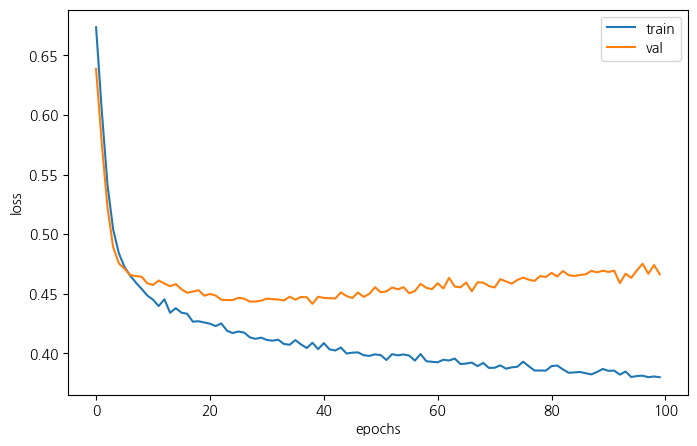

In [93]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델의 예측값 출력

In [94]:
pred = model.predict(mms_X_test)
pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.07401353],
       [0.12961048],
       [0.14544106],
       [0.89707947],
       [0.5622518 ],
       [0.9747833 ],
       [0.7354625 ],
       [0.11342831],
       [0.6527811 ],
       [0.9532818 ],
       [0.2113172 ],
       [0.06472573],
       [0.08294109],
       [0.10986529],
       [0.11190428],
       [0.9562104 ],
       [0.19636779],
       [0.7354625 ],
       [0.14582486],
       [0.23650794],
       [0.1287068 ],
       [0.27290606],
       [0.34598348],
       [0.14544106],
       [0.10946374],
       [0.03887528],
       [0.45493776],
       [0.12961048],
       [0.06329068],
       [0.43650708],
       [0.1506333 ],
       [0.43820393],
       [0.39145258],
       [0.4382512 ],
       [0.15818043],
       [0.10403761],
       [0.2955584 ],
       [0.7354625 ],
       [0.9605555 ],
       [0.10946374],
       [0.10526095],
       [0.07762158],
       [0.10946374],
       [0.09461746],
       [0.77119654],
       [0.04220488],
       [0.1506333 ],
       [0.132

In [95]:
result = pd.DataFrame(dict(y_test=y_test, pred=pred[:,0]))
result

,y_test,pred
709,1,0.074014
439,0,0.129610
840,0,0.145441
720,1,0.897079
39,1,0.562252
...,...,...
821,1,0.118242
633,0,0.288274
456,0,0.316187
500,0,0.166656


In [99]:
result['pred'] = result['pred'].apply(lambda x: 1 if x >=0.5 else 0)

In [100]:
result

,y_test,pred
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [101]:
from sklearn.metrics import classification_report
print(classification_report(result['y_test'],result['pred']))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.79      0.67      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(mms_X_train,y_train)
pred2 = dtc.predict(mms_X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       157
           1       0.73      0.62      0.67       111

    accuracy                           0.75       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.74      0.75      0.74       268



# Fumctional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러개 쌓는 형태라 복잡한 모델 생성에 한계가 있음.
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의할 수 있음. 
* Input(shap=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력을 정의

In [106]:
# tensorflow 2.19버전용
from keras.layers import Input, Dense
from keras.models import Model

In [111]:
# 입력층
inputs = Input(shape=(mms_X_train.shape[1],))

# 은닉층
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# 출력층
outputs = Dense(1, activation='sigmoid')(x)

# 모델 정의
model = Model(inputs=inputs , outputs=outputs)
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3963 - loss: 0.7010 - val_accuracy: 0.7724 - val_loss: 0.6527
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7942 - loss: 0.6353 - val_accuracy: 0.7799 - val_loss: 0.5991
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8021 - loss: 0.5728 - val_accuracy: 0.7836 - val_loss: 0.5440
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8046 - loss: 0.5126 - val_accuracy: 0.7799 - val_loss: 0.5063
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7875 - loss: 0.5076 - val_accuracy: 0.7873 - val_loss: 0.4873
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8245 - loss: 0.4509 - val_accuracy: 0.7910 - val_loss: 0.4690
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8048 - loss: 0.4686 - val_accuracy: 0.7910 - val_loss: 0.4593
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8070 - loss: 0.4699 - val_accuracy: 0.7873 - 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8376 - loss: 0.3894 - val_accuracy: 0.7985 - val_loss: 0.4467
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8281 - loss: 0.4051 - val_accuracy: 0.7910 - val_loss: 0.4443
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8339 - loss: 0.4164 - val_accuracy: 0.7910 - val_loss: 0.4462
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8674 - loss: 0.3371 - val_accuracy: 0.7985 - val_loss: 0.4425
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8474 - loss: 0.3752 - val_accuracy: 0.7948 - val_loss: 0.4452
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8399 - loss: 0.4004 - val_accuracy: 0.7910 - val_loss: 0.4469
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8315 - loss: 0.3833 - val_accuracy: 0.7910 - val_loss: 0.4428
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8477 - loss: 0.3736 - val_accuracy: 0.7910 - val_lo

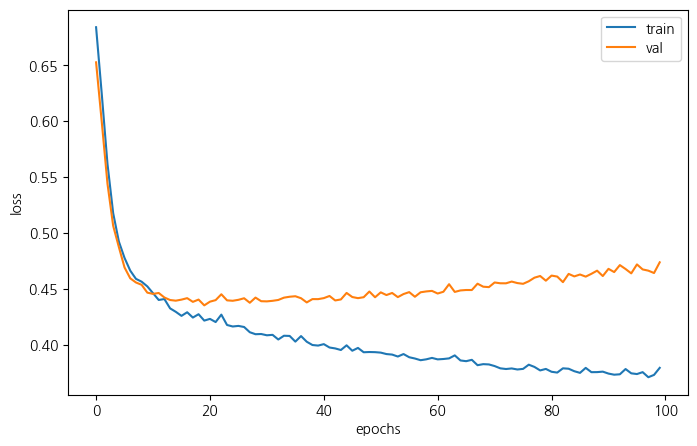

In [113]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100,
                   batch_size=32,
                   validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x:1 if x>=0.5 else 0)
print(classification_report(y_test, pred))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()



In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# class 형으로 만들기 (Model Subclass API)
* class 형태의 모델 정의 방법
* keras의 Model을 상속받아 작성

In [116]:
class Titanic(Model):
    def __init__(self):
        super(Titanic,self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(32, activation='relu')
        self.dense4 = Dense(16, activation='relu')
        self.classifier = Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.classifier(x)

In [117]:
model = Titanic()
print(model.summary())

Model: "titanic_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6340 - loss: 0.6504 - val_accuracy: 0.6381 - val_loss: 0.5800
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6943 - loss: 0.5404 - val_accuracy: 0.7985 - val_loss: 0.5331
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8061 - loss: 0.5164 - val_accuracy: 0.8060 - val_loss: 0.5121
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8144 - loss: 0.4970 - val_accuracy: 0.8097 - val_loss: 0.4914
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8178 - loss: 0.4707 - val_accuracy: 0.7873 - val_loss: 0.4635
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8016 - loss: 0.4692 - val_accuracy: 0.7836 - val_loss: 0.4626
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8093 - loss: 0.4588 - val_accuracy: 0.7985 - val_loss: 0.4603
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8259 - loss: 0.4163 - val_accuracy: 0.7836 - 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8415 - loss: 0.3756 - val_accuracy: 0.7836 - val_loss: 0.4970
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8365 - loss: 0.3844 - val_accuracy: 0.7948 - val_loss: 0.4808
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8326 - loss: 0.3949 - val_accuracy: 0.7910 - val_loss: 0.4917
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8520 - loss: 0.3764 - val_accuracy: 0.7873 - val_loss: 0.4952
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8552 - loss: 0.3779 - val_accuracy: 0.7910 - val_loss: 0.4982
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8424 - loss: 0.3728 - val_accuracy: 0.7910 - val_loss: 0.4851
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8418 - loss: 0.3908 - val_accuracy: 0.7836 - val_loss: 0.5075
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8508 - loss: 0.3857 - val_accuracy: 0.8022 - val_lo

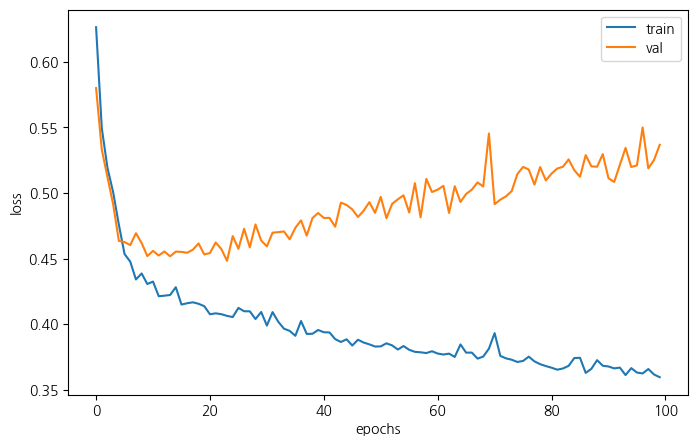

In [118]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, 
                    batch_size=32, validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [119]:
print(model.summary())

Model: "titanic_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,333 (138.02 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,556 (92.02 KB)

None
